In [1]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [7]:
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

sentence = "Aku punya mainan namanya lato-lato"

result = sentiment_analysis(sentence)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Sentence: {sentence} | Label : {status} ({score * 100:.3f}%)')

Sentence: Aku punya mainan namanya lato-lato | Label : neutral (98.425%)


In [5]:
import pandas as pd

def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

tweets_data = pd.read_csv('data/jhon.csv', sep='\t', converters={'thumbnail': convert_dtype, 'near': convert_dtype})

# filter each tweet and only use the tweet that has conversation_id = 1616059242561310720 or 1616482637006376960
tweets_data = tweets_data[(tweets_data['conversation_id'] == 1616059242561310720) | (tweets_data['conversation_id'] == 1616482637006376960)]

# save the result to csv file with name 'data/jhon_conversation.csv'
tweets_data.to_csv('data/jhon_conversation.csv', index=False)

# create a script to check the sentiment of each tweet, then save the result to result variable
result = sentiment_analysis(tweets_data['tweet'].tolist())

# show the total number of tweets
print(f'Total tweets: {len(result)}')

Total tweets: 923


In [6]:
# create a new column in the dataframe to store the sentiment result
tweets_data['sentiment'] = [label_index[i['label']] for i in result]
tweets_data['score'] = [i['score'] for i in result]

# filter the dataframe to only the tweet, sentiment, and score columns
tweets_data = tweets_data[['tweet', 'sentiment', 'score']]

# save the result to csv file
tweets_data.to_csv('data/jhon_sentiment.csv', index=False)

# overall sentiment with score and percentage of each sentiment (concat with %)
tweets_data['sentiment'].value_counts().to_frame().assign(
    percentage = lambda x: (x['sentiment'] / x['sentiment'].sum()) * 100
).style.format({'percentage': '{:.2f}%'})

,sentiment,percentage
negative,446,48.32%
neutral,399,43.23%
positive,78,8.45%


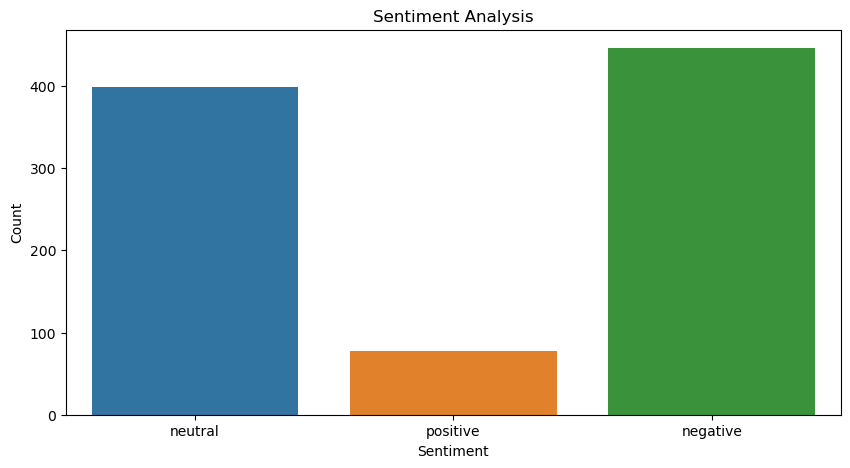

In [7]:
# Create a good report for the sentiment analysis

import matplotlib.pyplot as plt
import seaborn as sns

# set the figure size
plt.figure(figsize=(10, 5))

# create a barplot
sns.countplot(x='sentiment', data=tweets_data)

# set the title
plt.title('Sentiment Analysis')

# set the x and y label
plt.xlabel('Sentiment')
plt.ylabel('Count')

# show the plot
plt.show()

# negative	446	48.32%
# neutral	399	43.23%
# positive	78	8.45%

In [8]:
# create report and use library to show top 10 negative, positive, neutral tweets (display column name)
from IPython.display import display, HTML

for sentiment in ['positive', 'neutral', 'negative']:
    print(f'Top 10 {sentiment} tweets:')
    display(HTML(tweets_data[tweets_data['sentiment'] == sentiment].sort_values('score', ascending=False)['tweet'].head(10).to_frame().to_html()))
    print('')

Top 10 positive tweets:


,tweet
114810,@Askrlfess big no alias kaga makasih. karena di tempat kerjaku atasannya lebih baik. kerja sm bapak bapak expat selalu ada reward tiap bs achieved kerjaan dan tiap tahun ada event seru.
146692,@Askrlfess Pak John pizza enak sih
29368,@Askrlfess Wah seru seru
87833,"@Askrlfess Yg bikin karyawan loyal bukan semata mata hanya dengan naik gaji kagetan aja kok, kalau kita kasih value ke mereka, visi misi dan bekal skill mereka akan kasih 100% ke kita. Dan budaya kekeluargaan dan profesional harus berjalan beriringan."
147053,@Askrlfess Big no. Bos gua lebih baik gilee
153390,@Askrlfess boss gw jg asik
82224,"@Askrlfess Wkwkwkwk no thanks, alhamdulillah dapat tmpt kerja dan boss yg baek bgt, dibandingkan yg sebelumnya haha 😆..."
121214,@Askrlfess Cita2nya cetek bener nder
59140,@Askrlfess to be fair gasuka asas kekeluargaan dalam dunia kerja wkwk ga di anggap keluarga juga ga masalah yg penting kerjaan kelar.
79445,"@Askrlfess 2019 nganggur, 2023 si jhon lbf punya 6 perusahan. Keren bet sih, gabisa ditiru"



Top 10 neutral tweets:


,tweet
53460,@Askrlfess lagi di pantau ppatk
105873,@Askrlfess persyaratan kerja fc ijazah cv sama ss akun tiktok dia
157179,@Askrlfess Mau atasan hoodie aja
68754,@Askrlfess Sekilas wajahnya ada mirip²nya sama Pak RK
112997,@Askrlfess joko gaji km naik 200 rebu
100540,@Askrlfess Yang jual Netflix
143235,@Askrlfess saya mau jadi atasannya pak john aja nder
124220,@Askrlfess Atasan flanel aja dah
91803,@Askrlfess Info info @ForzaPSIS
133722,@Askrlfess Aku atasan flannel aja



Top 10 negative tweets:


,tweet
114932,"@Askrlfess Oh ternyata si konten mandi lumpur sma si ini sama2 bermasalah ternyata wkwk. Yg satu kreatifnya ketololan, yg satu tolol soal ketenagakerjaan"
86966,@Askrlfess Kalian jugaa kayak mak mak komplek. NAJIS!
101472,@Askrlfess sok banget ini orang
87485,"@Askrlfess Yg bnyk bacot di medsos model begini mah, biasa nya kenyataannya kebalikan nya... Dunia tipu2"
56807,"@Askrlfess Mukanya kek kontol, jahat bngt nih orang."
87829,@Askrlfess Najis ajgg
41494,@Askrlfess Tampangnya aja kayak bajingan gitu
39359,@Askrlfess Najis tai
97037,@Askrlfess Hancur sudah... Gw kaga pernah percaya dr awal liat dia video yg soal kantor adalah keluarga. Pale lu meleduk
86961,@Askrlfess Dari muka nya aja udah ketauan orang jahat
